# Deep dive into Text Generation Inference with LLMs

So far, we’ve explored the transformer architecture in relation to a range of discrete tasks, like text classification or summarization. However, Large Language Models are most used for text generation, and this is what we’ll explore in this chapter.

In this page, we’ll explore the core concepts behind LLM inference, providing a comprehensive understanding of how these models generate text and the key components involved in the inference process.

## Understanding the Basics
Let’s start with the fundamentals. Inference is the process of using a trained LLM to generate human-like text from a given input prompt. Language models use their knowledge from training to formulate responses one word at a time. The model leverages learned probabilities from billions of parameters to predict and generate the next token in a sequence. This sequential generation is what allows LLMs to produce coherent and contextually relevant text.

## The Role of Attention
The attention mechanism is what gives LLMs their ability to understand context and generate coherent responses. When predicting the next word, not every word in a sentence carries equal weight - for example, in the sentence “The capital of France is …”, the words “France” and “capital” are crucial for determining that “Paris” should come next. This ability to focus on relevant information is what we call attention.

This process of identifying the most relevant words to predict the next token has proven to be incredibly effective. Although the basic principle of training LLMs—predicting the next token—has remained generally consistent since BERT and GPT-2, there have been significant advancements in scaling neural networks and making the attention mechanism work for longer and longer sequences, at lower and lower costs.

In short, the attention mechanism is the key to LLMs being able to generate text that is both coherent and context-aware. It sets modern LLMs apart from previous generations of language models.

## Context Length and Attention Span
Now that we understand attention, let’s explore how much context an LLM can actually handle. This brings us to context length, or the model’s ‘attention span’.

The context length refers to the maximum number of tokens (words or parts of words) that the LLM can process at once. Think of it as the size of the model’s working memory.

These capabilities are limited by several practical factors:

    The model’s architecture and size
    Available computational resources
    The complexity of the input and desired output
    
In an ideal world, we could feed unlimited context to the model, but hardware constraints and computational costs make this impractical. This is why different models are designed with different context lengths to balance capability with efficiency.

The context length is the maximum number of tokens the model can consider at once when generating a response.

## The Art of Prompting
When we pass information to LLMs, we structure our input in a way that guides the generation of the LLM toward the desired output. This is called prompting.

Understanding how LLMs process information helps us craft better prompts. Since the model’s primary task is to predict the next token by analyzing the importance of each input token, the wording of your input sequence becomes crucial.

Careful design of the prompt makes it easier to guide the generation of the LLM toward the desired output.

## The Two-Phase Inference Process
Now that we understand the basic components, let’s dive into how LLMs actually generate text. The process can be broken down into two main phases: prefill and decode. These phases work together like an assembly line, each playing a crucial role in producing coherent text.

### The Prefill Phase
The prefill phase is like the preparation stage in cooking - it’s where all the initial ingredients are processed and made ready. This phase involves three key steps:

1) Tokenization: Converting the input text into tokens (think of these as the basic building blocks the model understands)
2) Embedding Conversion: Transforming these tokens into numerical representations that capture their meaning
3) Initial Processing: Running these embeddings through the model’s neural networks to create a rich understanding of the context

This phase is computationally intensive because it needs to process all input tokens at once. Think of it as reading and understanding an entire paragraph before starting to write a response.

### The Decode Phase
After the prefill phase has processed the input, we move to the decode phase - this is where the actual text generation happens. The model generates one token at a time in what we call an autoregressive process (where each new token depends on all previous tokens).

The decode phase involves several key steps that happen for each new token:

1) Attention Computation: Looking back at all previous tokens to understand context
2) Probability Calculation: Determining the likelihood of each possible next token
3) Token Selection: Choosing the next token based on these probabilities
4) Continuation Check: Deciding whether to continue or stop generation
This phase is memory-intensive because the model needs to keep track of all previously generated tokens and their relationships.

## Sampling Strategies
Now that we understand how the model generates text, let’s explore the various ways we can control this generation process. Just like a writer might choose between being more creative or more precise, we can adjust how the model makes its token selections.

You can interact with the basic decoding process yourself with SmolLM2 in this Space (remember, it decodes until reaching an EOS token which is <|im_end|> for this model):

### Understanding Token Selection: From Probabilities to Token Choices
When the model needs to choose the next token, it starts with raw probabilities (called logits) for every word in its vocabulary. But how do we turn these probabilities into actual choices? Let’s break down the process:

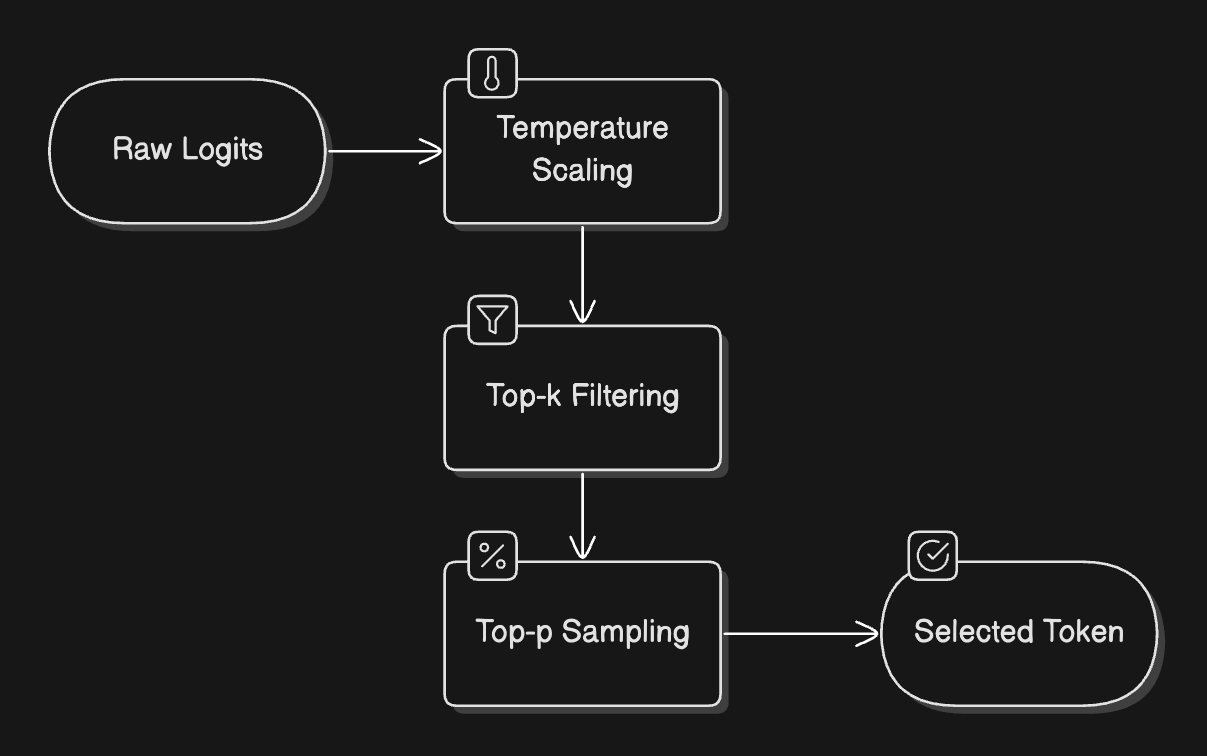

1) Raw Logits: Think of these as the model’s initial gut feelings about each possible next word
2) Temperature Control: Like a creativity dial - higher settings (>1.0) make choices more random and creative, lower settings (<1.0) make them more focused and deterministic
3) Top-p (Nucleus) Sampling: Instead of considering all possible words, we only look at the most likely ones that add up to our chosen probability threshold (e.g., top 90%)
4) Top-k Filtering: An alternative approach where we only consider the k most likely next words

### Managing Repetition: Keeping Output Fresh
One common challenge with LLMs is their tendency to repeat themselves - much like a speaker who keeps returning to the same points. To address this, we use two types of penalties:

1) Presence Penalty: A fixed penalty applied to any token that has appeared before, regardless of how often. This helps prevent the model from reusing the same words.
2) Frequency Penalty: A scaling penalty that increases based on how often a token has been used. The more a word appears, the less likely it is to be chosen again.
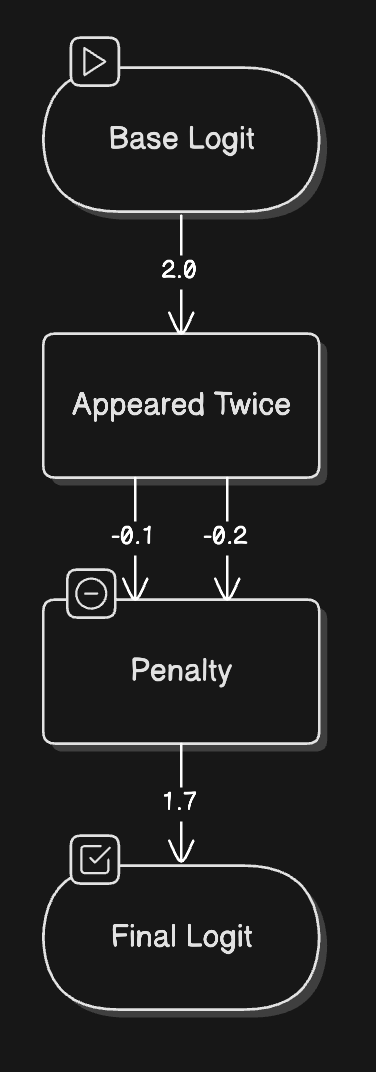

These penalties are applied early in the token selection process, adjusting the raw probabilities before other sampling strategies are applied. Think of them as gentle nudges encouraging the model to explore new vocabulary.

### Controlling Generation Length: Setting Boundaries

Just as a good story needs proper pacing and length, we need ways to control how much text our LLM generates. This is crucial for practical applications - whether we’re generating a tweet-length response or a full blog post.

We can control generation length in several ways:

1) Token Limits: Setting minimum and maximum token counts
2) Stop Sequences: Defining specific patterns that signal the end of generation
3) End-of-Sequence Detection: Letting the model naturally conclude its response
For example, if we want to generate a single paragraph, we might set a maximum of 100 tokens and use “\n\n” as a stop sequence. This ensures our output stays focused and appropriately sized for its purpose.

### Beam Search: Looking Ahead for Better Coherence
While the strategies we’ve discussed so far make decisions one token at a time, beam search takes a more holistic approach. Instead of committing to a single choice at each step, it explores multiple possible paths simultaneously - like a chess player thinking several moves ahead.

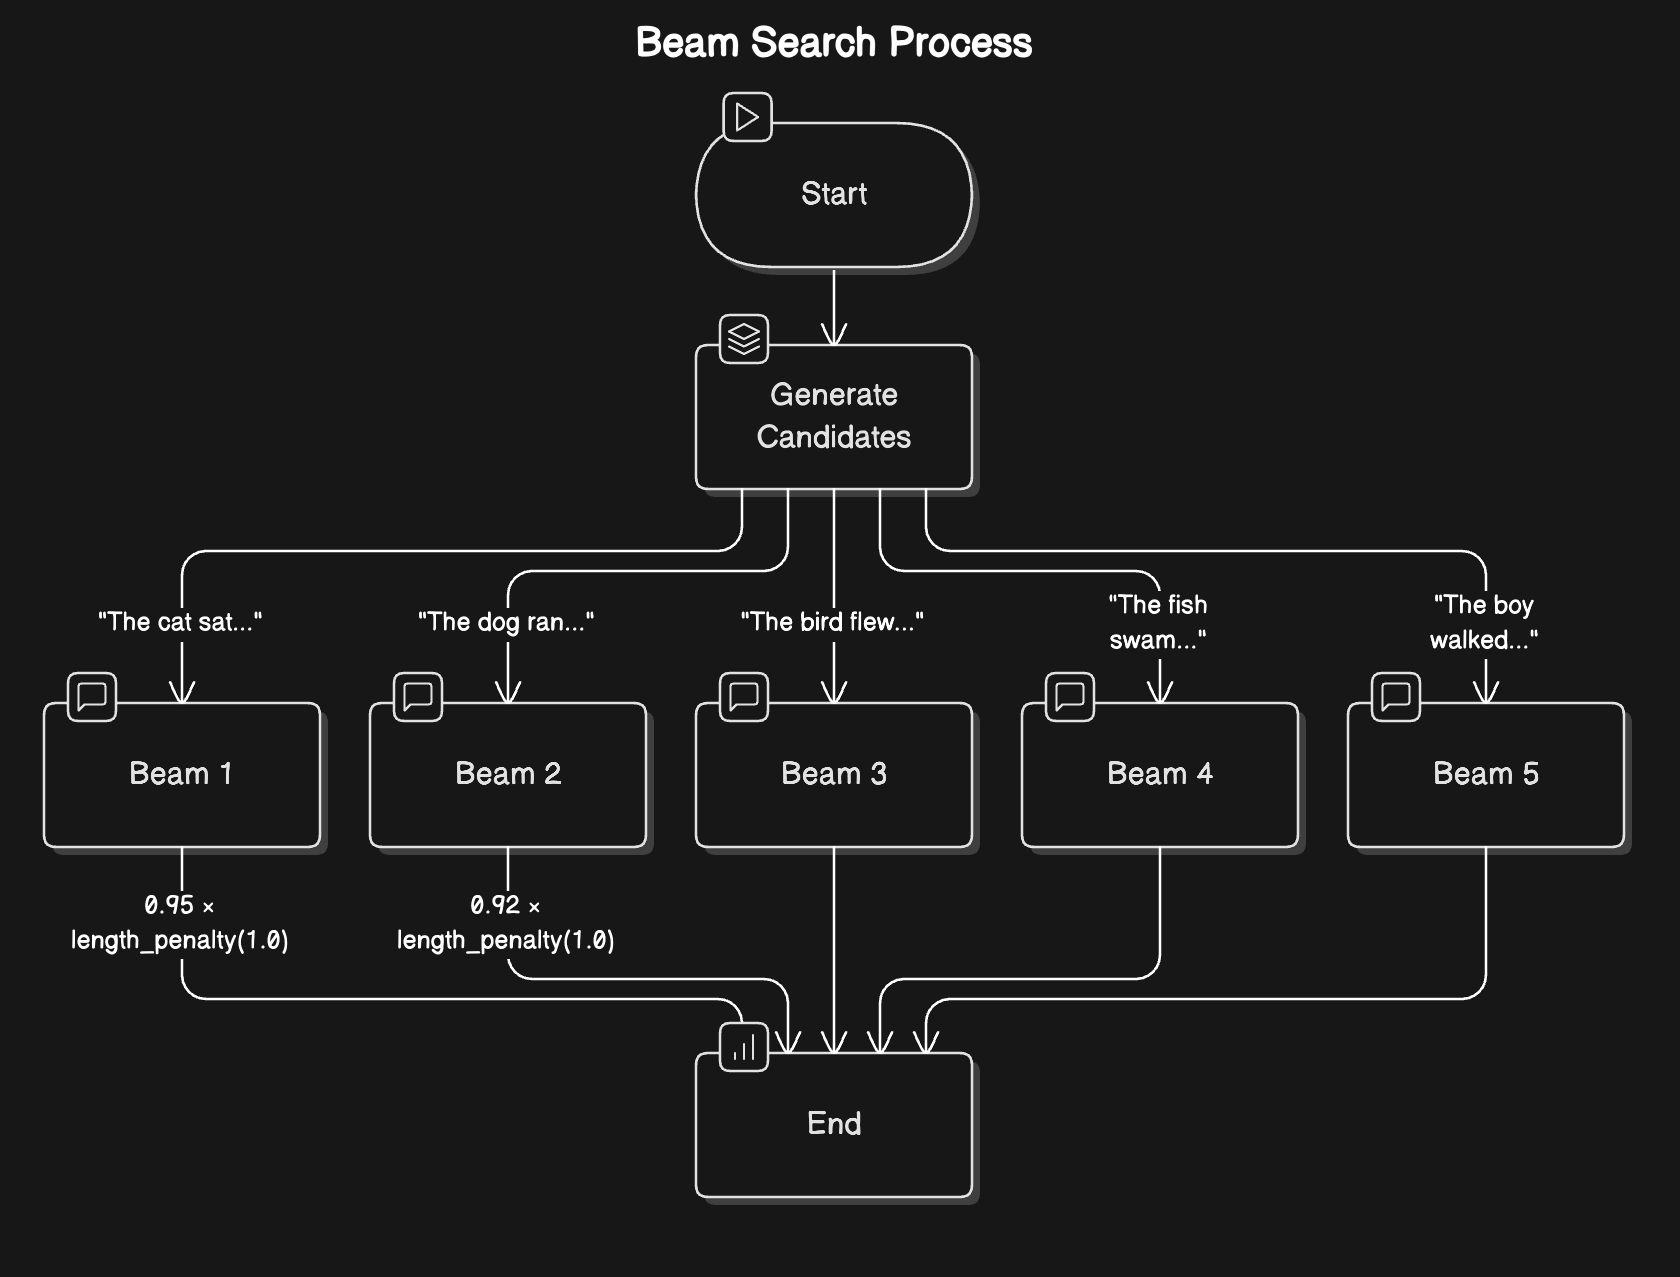

Here’s how it works:

1) At each step, maintain multiple candidate sequences (typically 5-10)
2) For each candidate, compute probabilities for the next token
3) Keep only the most promising combinations of sequences and next tokens
4) Continue this process until reaching the desired length or stop condition
5) Select the sequence with the highest overall probability

You can explore beam search visually here:

This approach often produces more coherent and grammatically correct text, though it requires more computational resources than simpler methods.

## Practical Challenges and Optimization
As we wrap up our exploration of LLM inference, let’s look at the practical challenges you’ll face when deploying these models, and how to measure and optimize their performance.

### Key Performance Metrics
When working with LLMs, four critical metrics will shape your implementation decisions:

    Time to First Token (TTFT): How quickly can you get the first response? This is crucial for user experience and is primarily affected by the prefill phase.
    
    Time Per Output Token (TPOT): How fast can you generate subsequent tokens? This determines the overall generation speed.
    
    Throughput: How many requests can you handle simultaneously? This affects scaling and cost efficiency.
    
    VRAM Usage: How much GPU memory do you need? This often becomes the primary constraint in real-world applications.

### The Context Length Challenge
One of the most significant challenges in LLM inference is managing context length effectively. Longer contexts provide more information but come with substantial costs:

    Memory Usage: Grows quadratically with context length
    
    Processing Speed: Decreases linearly with longer contexts
    
    Resource Allocation: Requires careful balancing of VRAM usage

Recent models like Qwen2.5-1M offer impressive 1M token context windows, but this comes at the cost of significantly slower inference times. The key is finding the right balance for your specific use case.

### The KV Cache Optimization
To address these challenges, one of the most powerful optimizations is KV (Key-Value) caching. This technique significantly improves inference speed by storing and reusing intermediate calculations. This optimization:

    Reduces repeated calculations
    
    Improves generation speed
    
    Makes long-context generation practical

The trade-off is additional memory usage, but the performance benefits usually far outweigh this cost.

## Conclusion
Understanding LLM inference is crucial for effectively deploying and optimizing these powerful models. We’ve covered the key components:

    The fundamental role of attention and context
    
    The two-phase inference process
    
    Various sampling strategies for controlling generation
    
    Practical challenges and optimizations

By mastering these concepts, you’ll be better equipped to build applications that leverage LLMs effectively and efficiently.

Remember that the field of LLM inference is rapidly evolving, with new techniques and optimizations emerging regularly. Stay curious and keep experimenting with different approaches to find what works best for your specific use cases.

